In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [1]:
!nvidia-smi
!nvcc -V


Fri Jul 25 17:15:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   54C    P8             12W /  125W |     516MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import userdata
key = userdata.get('openai-api')
key = userdata.get('hf-api')
key = userdata.get('travily-api')
key = userdata.get('gemini-api')
key = userdata.get('serp-api')
key = userdata.get('wandb')
key = userdata.get('langsmith')


In [15]:
import sys
sys.version_info

!pip install tensorflow keras torch transformers datasets accelerate langchain gradio openai ultralytics wandb

In [4]:
import torch
torch.cuda.is_available()
torch.__version__


'2.6.0+cu118'

In [5]:
import transformers, torch
from transformers import pipeline

print(transformers.__version__)
print(torch.cuda.is_available())


4.51.3
True


In [6]:
%ls

 F ����̺��� ����: Data
 ���� �Ϸ� ��ȣ: D636-8E60

 f:\projects\AI_foundation_tutorial\2_ML_basic ���͸�

2025-07-25  ���� 02:02    <DIR>          .
2025-07-25  ���� 05:14    <DIR>          ..
2025-04-27  ���� 07:31            18,220 1_colab-env.ipynb
2025-07-14  ���� 07:15            30,824 2_basic_numpy.ipynb
2025-07-25  ���� 01:57            35,441 3_scikit_learn.ipynb
2025-05-01  ���� 03:22         1,635,228 dev-env.docx
               4�� ����           1,719,713 ����Ʈ
               2�� ���͸�  59,842,740,224 ����Ʈ ����


In [7]:
%cd sample_data

[WinError 2] 지정된 파일을 찾을 수 없습니다: 'sample_data'
f:\projects\AI_foundation_tutorial\2_ML_basic


In [8]:
%pwd

'f:\\projects\\AI_foundation_tutorial\\2_ML_basic'

In [9]:
!git

usage: git [-v | --version] [-h | --help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--no-lazy-fetch]
           [--no-optional-locks] [--no-advice] [--bare] [--git-dir=<path>]
           [--work-tree=<path>] [--namespace=<name>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   restore    Restore working tree files
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisi

In [10]:
!pip list

Package                                  Version
---------------------------------------- ---------------
absl-py                                  2.2.2
accelerate                               1.6.0
ag2                                      0.9.1.post0
aiofiles                                 23.2.1
aiohappyeyeballs                         2.6.1
aiohttp                                  3.11.14
aiolimiter                               1.2.1
aiosignal                                1.3.2
aiosqlite                                0.21.0
alembic                                  1.16.3
alpha_vantage                            3.0.0
altair                                   5.5.0
annotated-types                          0.7.0
anthropic                                0.49.0
anyio                                    4.9.0
appdirs                                  1.4.4
argcomplete                              3.6.2
asgiref                                  3.8.1
asttokens                           

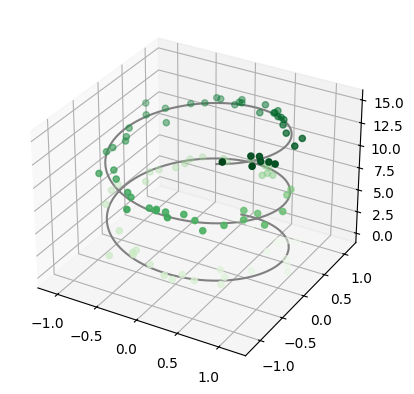

In [11]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [ ]:
from google.colab import files
data_to_load = files.upload()

In [13]:
%ls

 F ����̺��� ����: Data
 ���� �Ϸ� ��ȣ: D636-8E60

 f:\projects\AI_foundation_tutorial\2_ML_basic ���͸�

2025-07-25  ���� 02:02    <DIR>          .
2025-07-25  ���� 05:14    <DIR>          ..
2025-04-27  ���� 07:31            18,220 1_colab-env.ipynb
2025-07-14  ���� 07:15            30,824 2_basic_numpy.ipynb
2025-07-25  ���� 01:57            35,441 3_scikit_learn.ipynb
2025-05-01  ���� 03:22         1,635,228 dev-env.docx
               4�� ����           1,719,713 ����Ʈ
               2�� ���͸�  59,842,740,224 ����Ʈ ����


In [ ]:
import pandas as pd

data = {'Unemployment_Rate': [6.1,5.8,5.7,5.7,5.8,5.6,5.5,5.3,5.2,5.2],
        'Stock_Index_Price': [1500,1520,1525,1523,1515,1540,1545,1560,1555,1565]
       }

df = pd.DataFrame(data,columns=['Unemployment_Rate','Stock_Index_Price'])
df.to_csv("dataset.csv")

df = pd.read_csv("dataset.csv")
display(df)

from google.colab import files
files.download('dataset.csv')

In [ ]:
# https://www.geeksforgeeks.org/debugging-in-google-colab/
# !pip install ipdb
# import ipdb
# %pdb on
# ipdb.set_trace()
%debug
test = 1
%debug
test = 2
%debug
test = 3